In [3]:
import numpy as np
#from geneticalgorithm import geneticalgorithm as ga
import random
from graph import Graph
import  matplotlib.pyplot as plt
from shapely.geometry import Polygon, MultiPoint
from polygons import Polygons
from energy import Energy
from search import MC
from scipy.special import binom 
from search import Encode

ModuleNotFoundError: No module named 'geneticalgorithm'

In [2]:
import networkx as nx

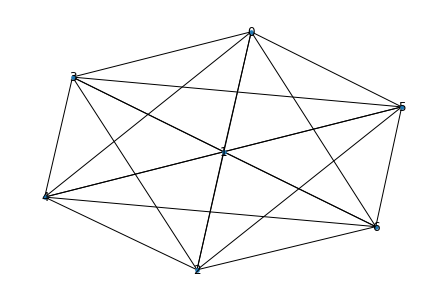

In [80]:
graph = Graph.fully(7)
polygon_object = Polygons(graph)
G = nx.from_numpy_matrix(graph.adj_matrix)
nx.draw(G, with_labels=True, node_size=12)

In [81]:
polygon_object = Polygons(graph)
mc = MC(polygon_object)
factors = [0, 0, 0, 200]
mc.factors = factors

In [82]:
energy = []

In [89]:
%%time
for i in range(10):
    mc.apply('contract', 100)
    energy.append(Energy(mc.polygon)(mc.polygon))


CPU times: user 6.79 s, sys: 0 ns, total: 6.79 s
Wall time: 6.79 s


No handles with labels found to put in legend.


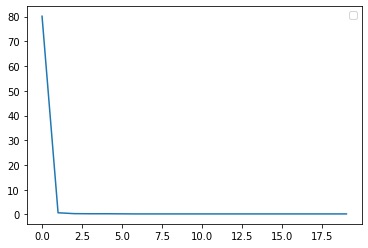

In [90]:
plt.plot(energy)
plt.legend()

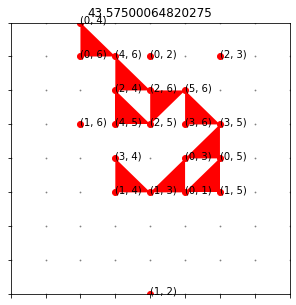

15


In [91]:
mc.polygon.move_center_to_middle()
fig,ax=plt.subplots(ncols=1, figsize=(5,5))
mc.polygon.visualize(ax, mc.polygon.get_all_polygon_coords())
fit = Energy(mc.polygon)
ax.set_title(str(fit(mc.polygon, factors=factors)))
plt.show()
print(graph.num_constrains())

Text(0.5, 1.0, '3.7995047602710956')

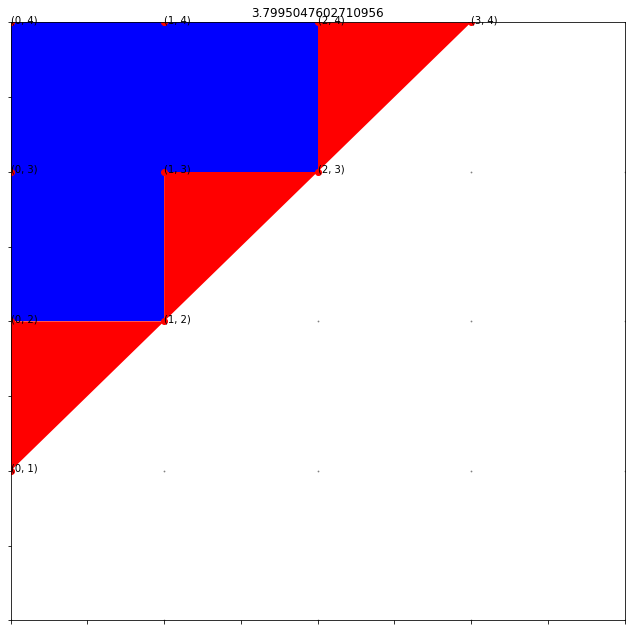

In [22]:
polygon_object = Polygons(graph)
fig,ax=plt.subplots(ncols=1, figsize=(11,11))
lhz_coords = qbits = polygon_object.qbits 
polygon_object.update_qbits_coords(qbits, lhz_coords)
polygon_object.visualize(ax, polygon_object.get_all_polygon_coords())
plt.title(str(Energy(polygon_object)(polygon_object, factors=factors)))

In [23]:
from scipy.special import binom

In [29]:
def ratio_plaqs_non_plaqs(N):
    graph = Graph.fully(N)
    polygon_object = Polygons(graph)
    lhz_coords = qbits = polygon_object.qbits 
    polygon_object.update_qbits_coords(qbits, lhz_coords)
    is_plaqs = Energy(polygon_object).distance_to_plaquette()
    p = len(is_plaqs)
    c = is_plaqs.count(0)
    return [int(p), int(c), Energy(polygon_object)(polygon_object)]

In [30]:
def real(N):
    P = binom(N, 4) * 3 + binom(N, 3)
    C = N / 2 * (N - 1) - N + 1 
    return int(P - C), int(C)

In [31]:
Ns = [i for i in range(4, 10)]

array([0.00400153, 0.01899752, 0.0549676 , 0.12487292, 0.24465124,
       0.43321191])

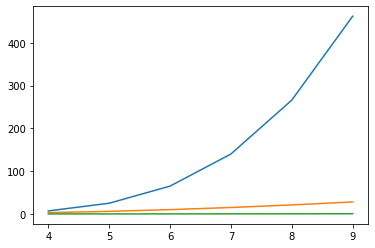

In [32]:
#plt.plot(Ns, list(map(real, Ns)))
plt.plot(Ns, list(map(ratio_plaqs_non_plaqs, Ns)))
np.array(list(map(ratio_plaqs_non_plaqs, Ns)))[:,2]

In [42]:
def ff(N):
    graph = Graph.fully(N)
    polygon_object = Polygons(graph)
    lhz_coords = qbits = polygon_object.qbits 
    polygon_object.update_qbits_coords(qbits, lhz_coords)
    c3 = []
    c4 = []
    for c, i in zip(polygon_object.get_all_polygon_coords(),
                    polygon_object.polygon_weights(Energy(polygon_object).distance_to_plaquette())):
        if len(c) == 4:
            #print('pla4', polygon_object.is_unit_square(c), c, i)
            c4.append(polygon_object.is_unit_square(c))
        else:
            #print('plaq3', polygon_object.is_unit_triangle(c), c, i)
            c3.append(polygon_object.is_unit_triangle(c))


    p3   = np.array(sorted(c3))
    isp3 = p3[p3 == 0]
    nop3 = p3[p3  > 0]

    # isp3 -= (2 - 2 ** 0.5)
    # nop3 -= (2 - 2 ** 0.5)

    p4   = np.array(sorted(c4))
    isp4 = p4[p4 == 0]
    nop4 = p4[p4  > 0]

    # isp4 -= (2 * 2 ** 0.5 - 2)
    # nop4 -= (2 * 2 ** 0.5 - 2)

    isp3 -= 0.5
    nop3 -= 0.5
    isp4 -= 0.5
    nop4 -= 0.5

    return isp3,nop3,

In [75]:
def real3(N):
    P = binom(N, 3)
    C = N - 1
    return int(P - C), int(C)

In [56]:
def real4(N):
    P = binom(N, 4) * 3 
    C = N / 2 * (N - 1) - 2 * (N - 1) 
    return int(P - C), int(C)

In [70]:
Ns = [i for i in range(4, 20)]
enp = np.array(list(map(lambda x: ff(x)[1].sum(), Ns)))

In [76]:
nnp = np.array(list(map(lambda x: real3(x)[0], Ns)))

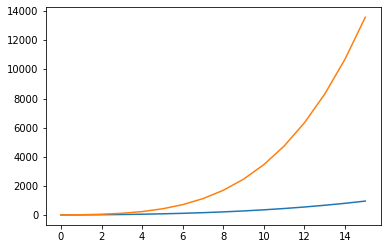

In [78]:
plt.plot(nnp)
plt.plot(enp)

In [67]:
#def area():
import itertools
N = 4
polygons = []
for l in itertools.combinations([i for i in range(1, N + 1)], 4):
    liste = list(l)
    polygons.append(liste)
    liste = non_cyclic_permutation(liste)
    polygons.append(liste)
    liste = non_cyclic_permutation(liste)
    polygons.append(liste)

In [64]:
def non_cyclic_permutation(liste):
    liste.insert(1, liste[-1])
    liste.pop(-1)
    return liste
    

In [68]:
polygons

[[1, 3, 4, 2], [1, 3, 4, 2], [1, 3, 4, 2]]

In [63]:
l = [1,2,3,4]

l

[1, 4, 2, 3]